# 06장

In [8]:
# 비지도 학습은 타깃을 모르는 경우 사용
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy

In [9]:
import numpy as np
fruits = np.load('fruits_300.npy')

In [10]:
fruits.shape

(300, 100, 100)

In [11]:
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

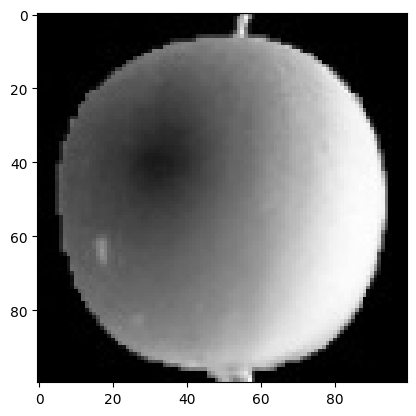

In [12]:
import matplotlib.pyplot as plt
plt.imshow(fruits[0], cmap='gray')
plt.show()

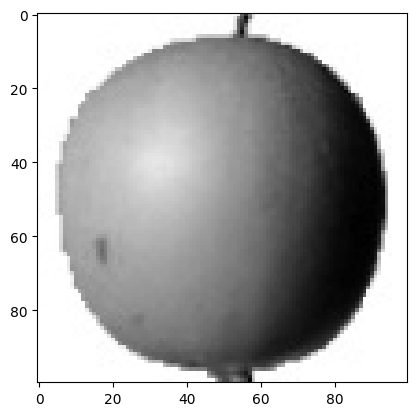

In [13]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

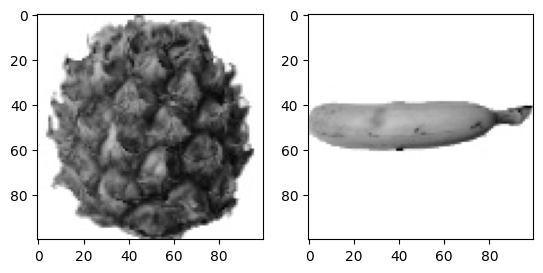

In [14]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [15]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [16]:
apple.shape

(100, 10000)

In [17]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

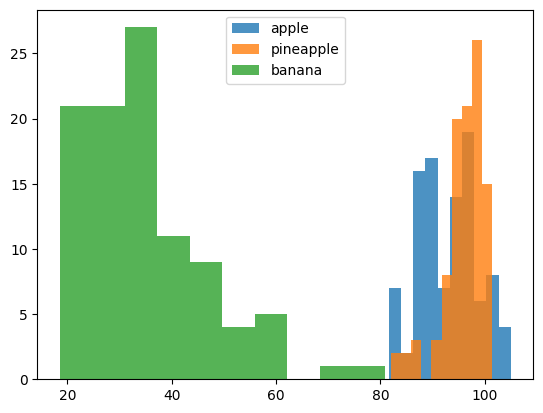

In [18]:
plt.hist(np.mean(apple,axis=1),alpha=0.8)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()
# 바나나는 구별이 되겠는데 사과와 파인애플은 어렵군

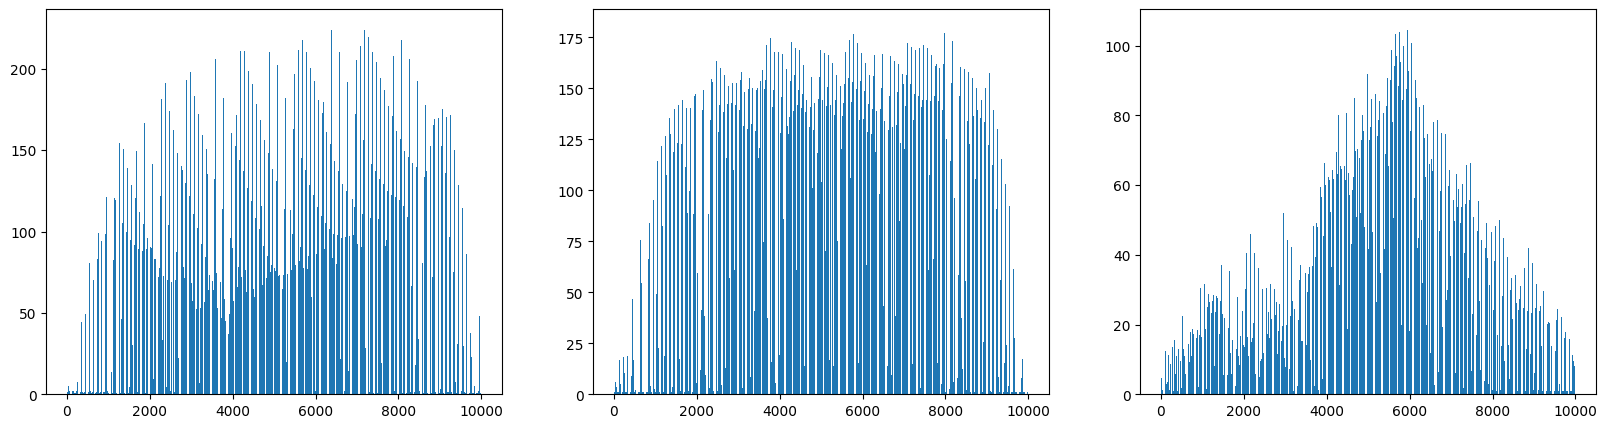

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

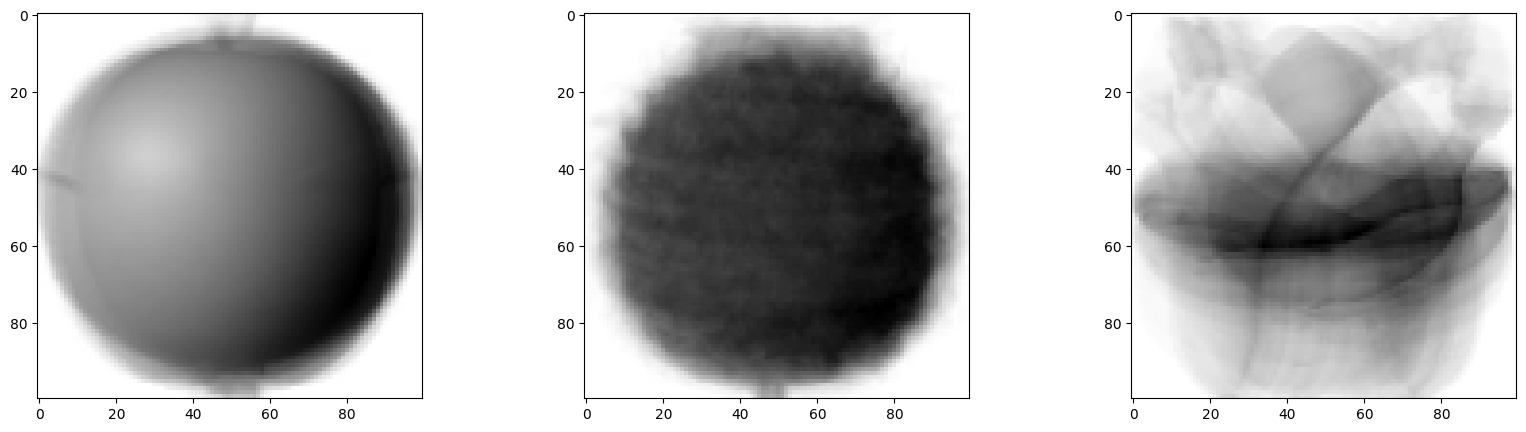

In [20]:
# 픽셀 평균값을 이미지처럼 출력
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [21]:
# fruits 배열의 모든 샘플에서 apple_mean값을 뺀 절댓값의 평균을 게산하여 apple_mean과 가장 가까운 사진을 골라보자
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
abs_mean.shape

(300,)

In [22]:
abs_diff2 = np.abs(fruits - pineapple_mean)
abs_mean2 = np.mean(abs_diff2, axis=(1,2))
abs_mean2.shape

(300,)

In [23]:
abs_diff3 = np.abs(fruits - banana_mean)
abs_mean3 = np.mean(abs_diff3, axis=(1,2))
abs_mean3.shape

(300,)

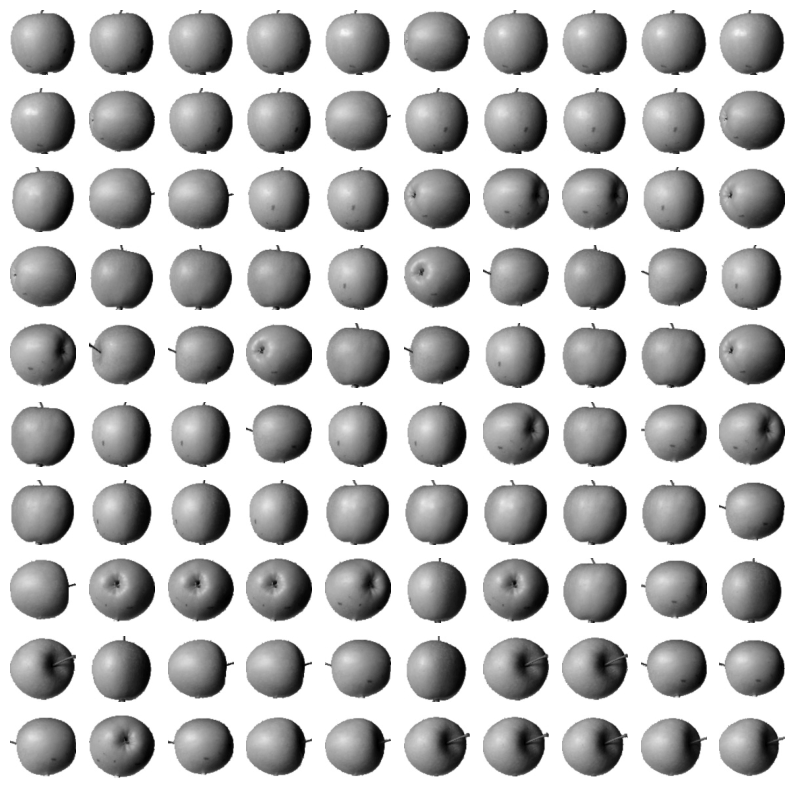

In [24]:
# apple_mean과 오차가 가장 작은 샘플 100개를 골라보자
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()
# 비슷한 샘플끼리 그룹으로 모으는 작업을 군집이라고 하며, 여기서 만들어진 그룹을 클러스터라고 부름

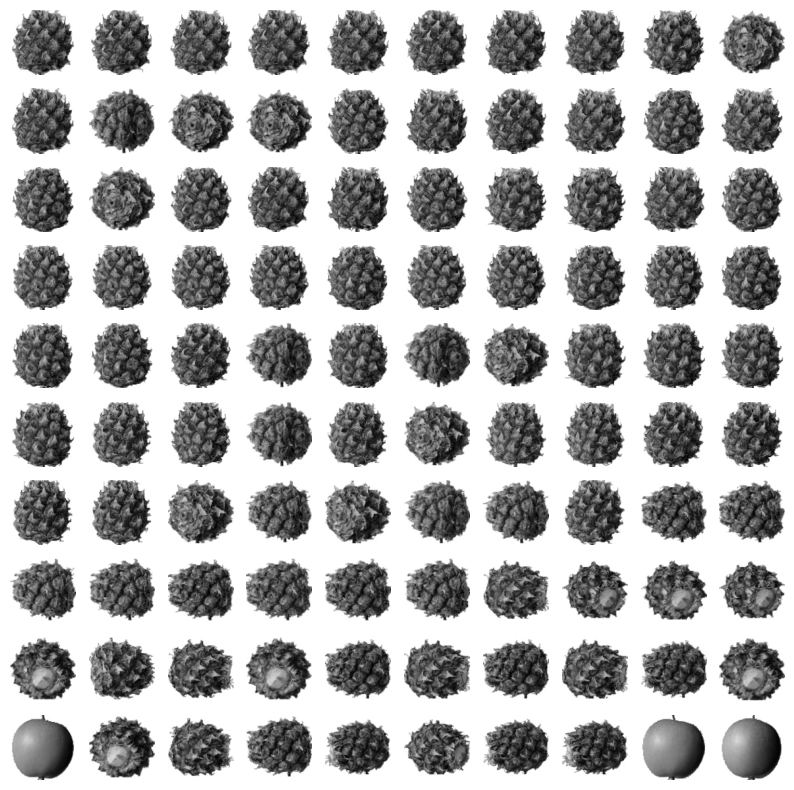

In [25]:
pineapple_index = np.argsort(abs_mean2)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

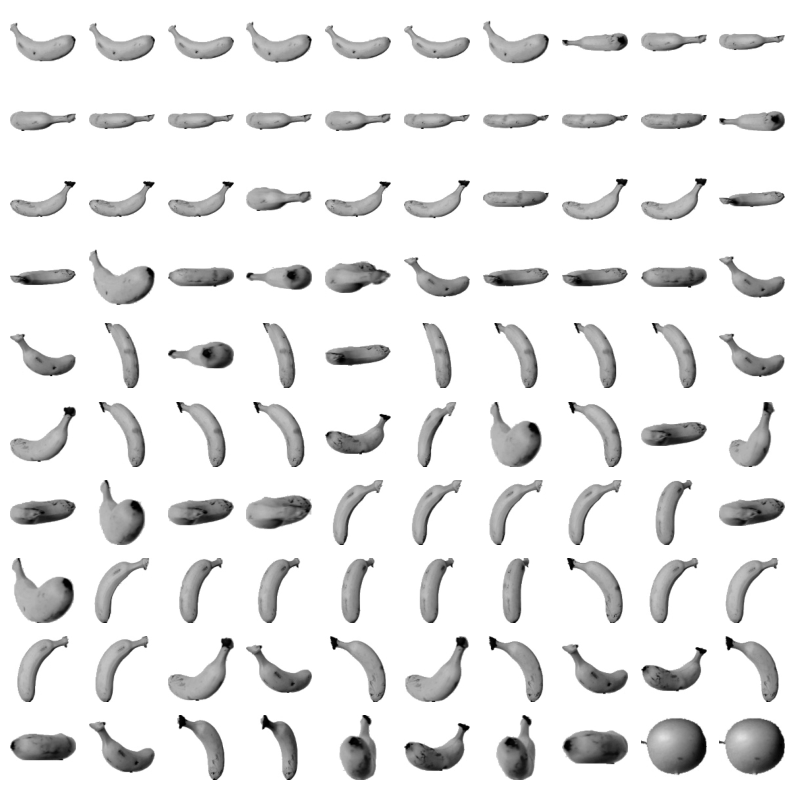

In [26]:
banana_index = np.argsort(abs_mean3)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

# 06 - 2

In [27]:
# 1장에서는 과일이 사과, 파인애플, 바나나임을 미리 알고 있었기에 각 과일의 평균을 구할 수 있었지만..
# 어떤 과일이 있는지 모르는 경우에는 k-평균 군집 알고리즘이 평균값을 자동으로 찾아준다.
# 이 평균값은 클러스터의 중심에 위치하기 때문에 클러스터 중심 또는 센트로이드라고 부른다.
# K-means 작동 방식
# 1. 무작위로 k개의 클러스터 중심을 정함
# 2. 각 샘픙ㄹ에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
# 3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심 변경
# 4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복
# 실습
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [28]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

c:\Users\TaeHwan Lim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [29]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))

In [30]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

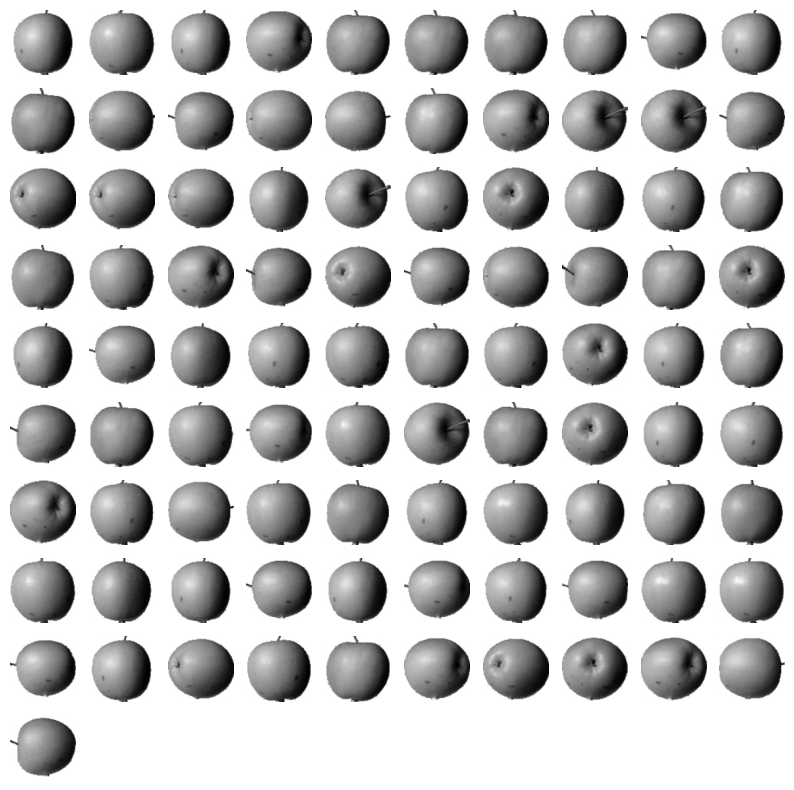

In [31]:
draw_fruits(fruits[km.labels_==0])

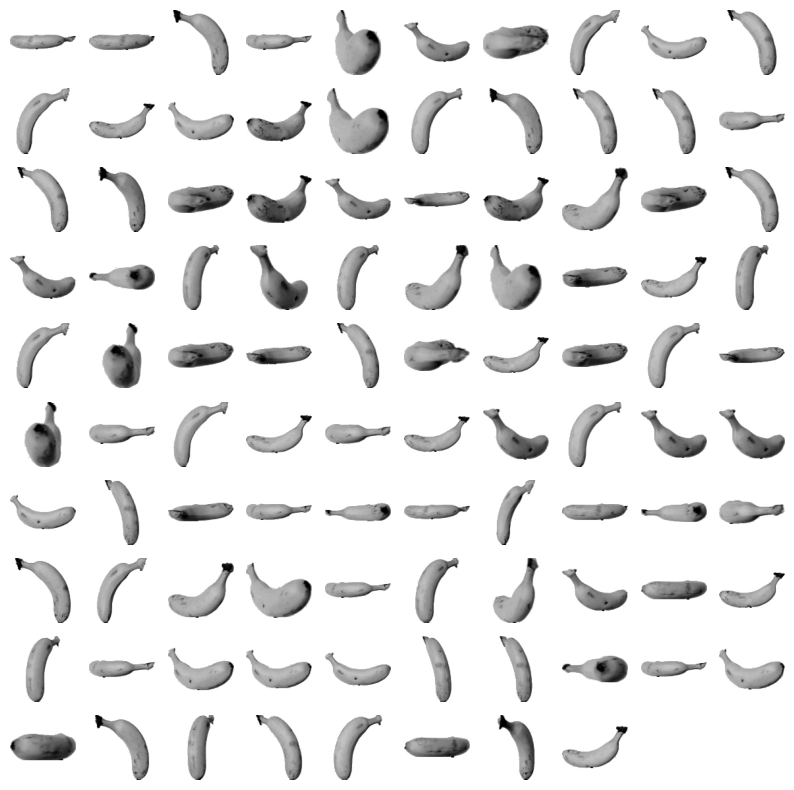

In [32]:
draw_fruits(fruits[km.labels_==1])

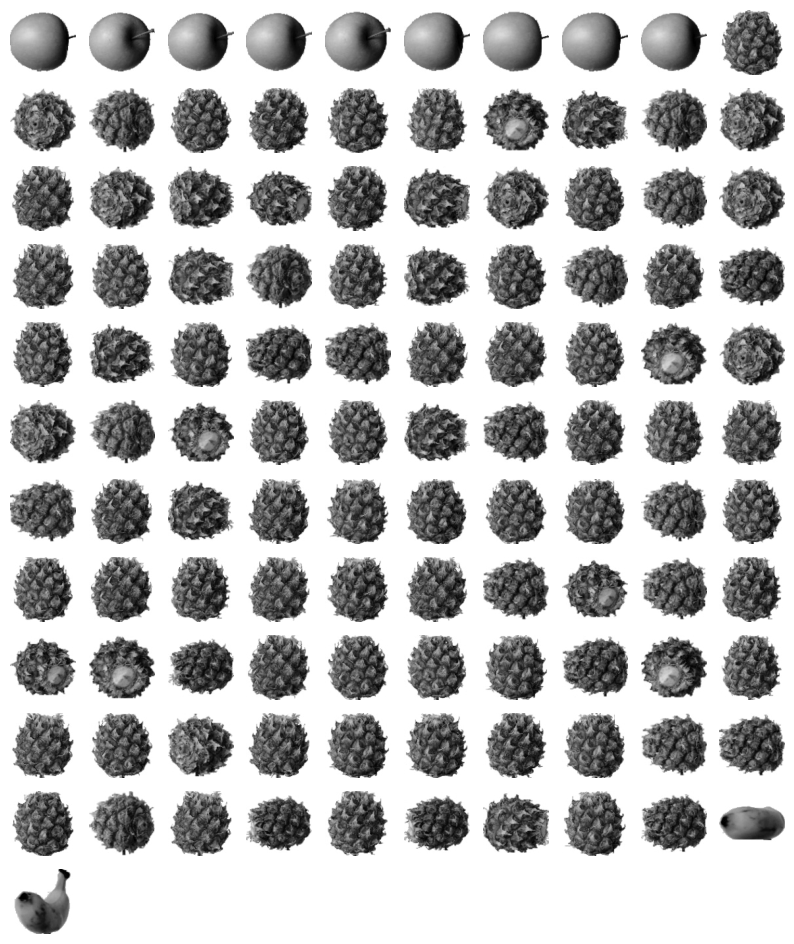

In [33]:
draw_fruits(fruits[km.labels_==2])

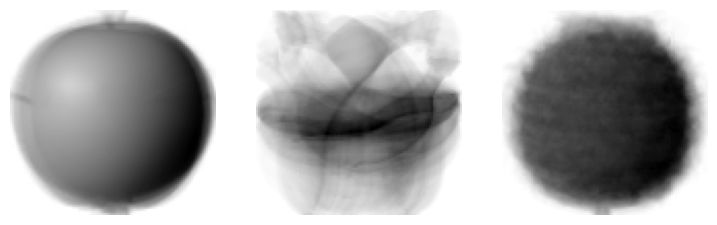

In [34]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [35]:
km.transform(fruits_2d[100:101])

array([[5267.70439881, 8837.37750892, 3393.8136117 ]])

In [36]:
km.predict(fruits_2d[100:101])

array([2])

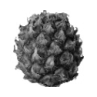

In [37]:
draw_fruits(fruits[100:101])

In [38]:
km.n_iter_

4

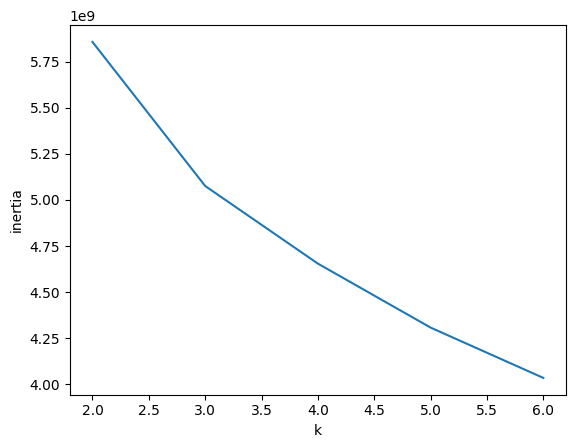

In [39]:
# 지금은 클러스터 개수가 3으로 지정했지만 원래는 클러스터를 몇개로 지정해야할지도 모를텐데?
# 그러니까 최적의 k를 찾아보자
# 여기서는 엘보우 방법을 사용해보자
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [40]:
# 3에 가까운 지점에서 꺾이는 것으로 보아 최적의 k는 3이구먼

# 06 - 3

In [41]:
# 데이터가 가진 속성을 특성이라 부르며 머신러닝에서는 차원이라고도 부른다.
# 차원이 많아질수록 디스크 공간 등이 부족하기 때문에 비지도 학습의 하나인 차원 축소 알고리즘을 학습한다.
# 그 중 대표적인 차원 축소 알고리즘인 주성분 분석(PCA)를 학습한다.
# 분산이 큰 방향을 향하는 벡터를 주성분이라고 부름.
# 주성분을 찾고 여기에 수직이며 분산이 가장 큰 다음 방향을 찾으면 그게 두 번째 주성분, 두 번째 주성분의 개수는 원본 데이터의 개수와 같다.

In [42]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [44]:
pca.components_.shape

(50, 10000)

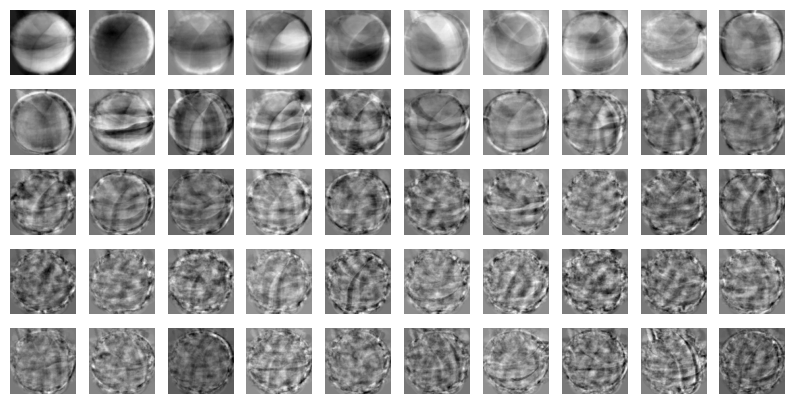

In [45]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [46]:
fruits_2d.shape

(300, 10000)

In [47]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [48]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

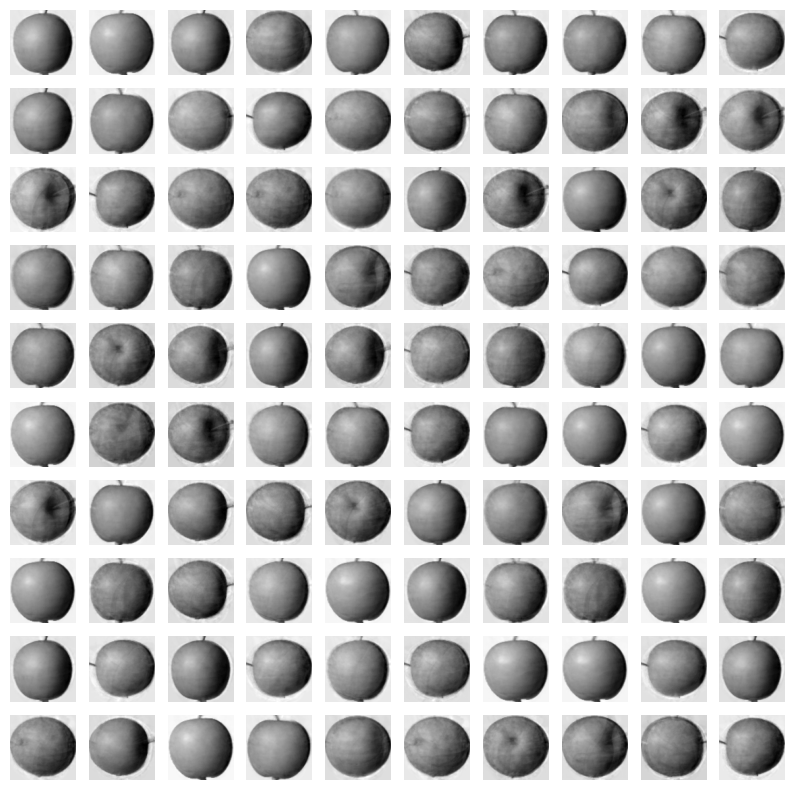

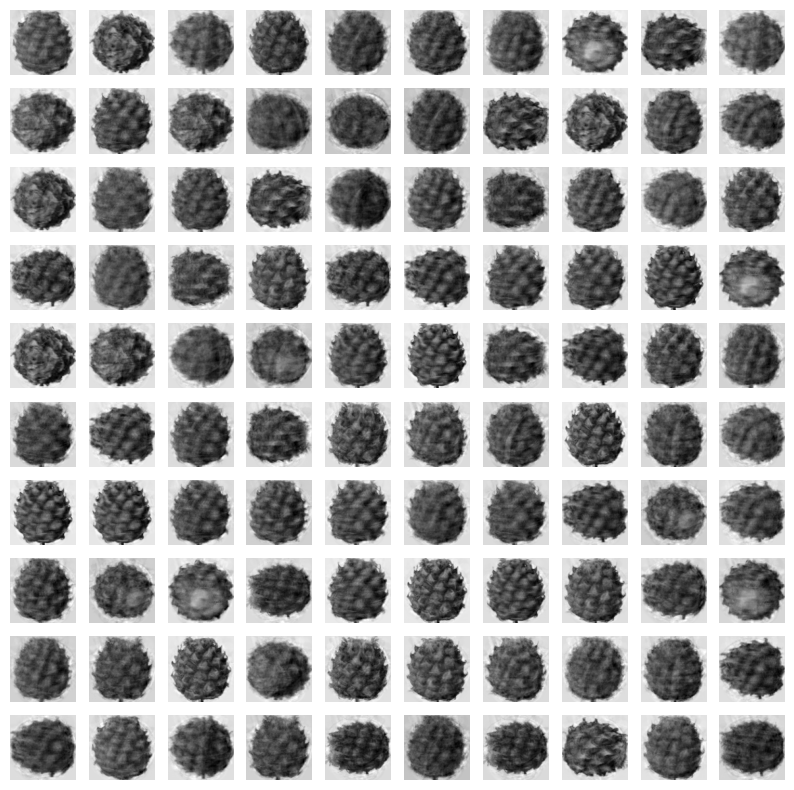

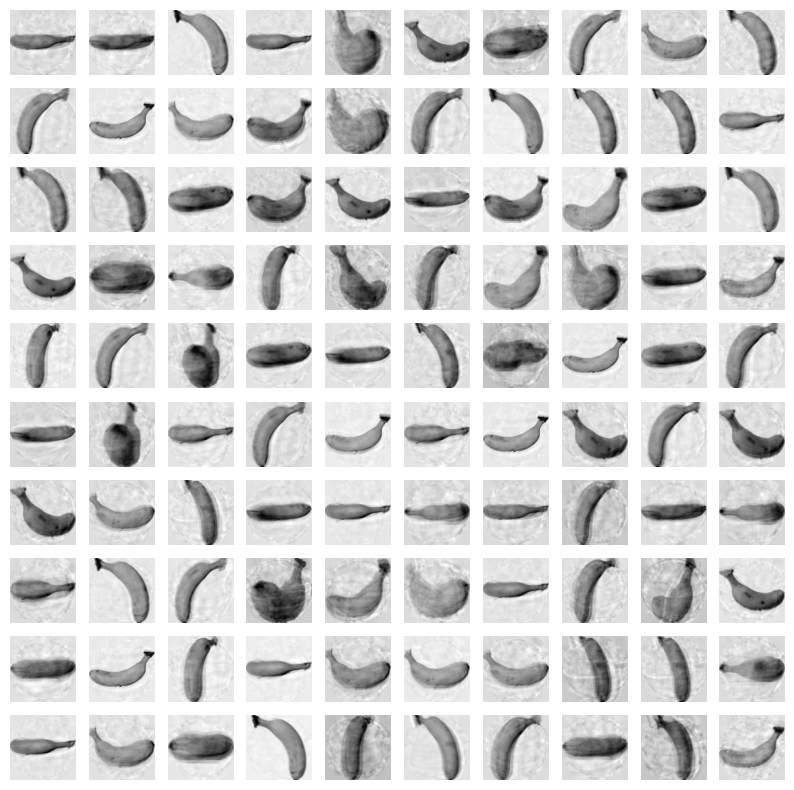

In [49]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [50]:
# 설명된 분산
# 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
np.sum(pca.explained_variance_ratio_)
# 이거는 현재 92% 정도를 설명하고 있으므로 복원이 잘 된 것.

0.9214683233004631

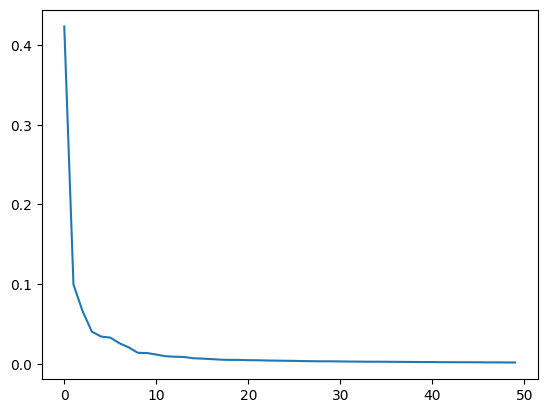

In [51]:
# 설명된 분산의 비율을 그래프로 그리면 적절한 주성분의 개수를 찾는데 도움이 됨.
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [52]:
# 대부분의 분산은 처음 10개의 주성분이 표현하고 있음

In [53]:
# PCA를 다른 알고리즘과 함께 사용하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [55]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])
# 특성이 10000개나 되기 때문에 과대적합 및 걸린 시간 체크

(0.9966666666666667, 0.3502057552337646)

In [56]:
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(1.0, 0.007973146438598634)

In [57]:
# PCA로 차원을 축소하니 정확도도 오르고 시간도 줄었다

In [58]:
# n_components 매개변수에 주성분의 개수를 지정하는데 원하는 설명된 분산의 비율을 입력할 수 있음
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [59]:
pca.n_components_

2

In [60]:
# 2개의 특성으로 원본 데이터에 있는 분산의 50%를 표현했음
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [61]:
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

c:\Users\TaeHwan Lim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\TaeHwan Lim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

(0.9933333333333334, 0.010963344573974609)

In [62]:
# 이번엔 K-Means로 클러스터를 찾아보자
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

c:\Users\TaeHwan Lim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

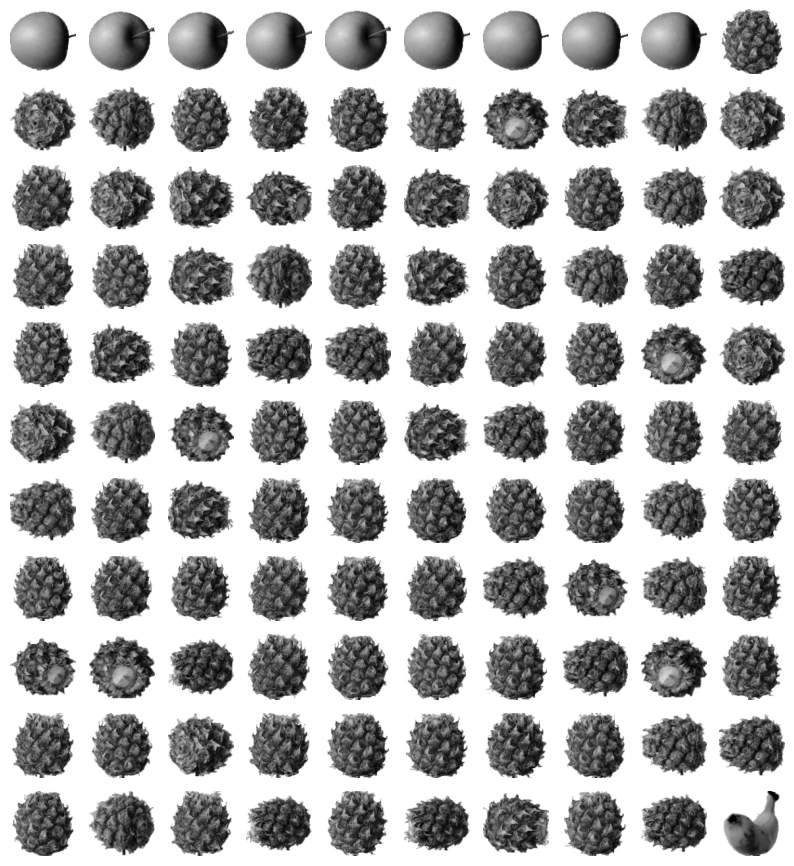

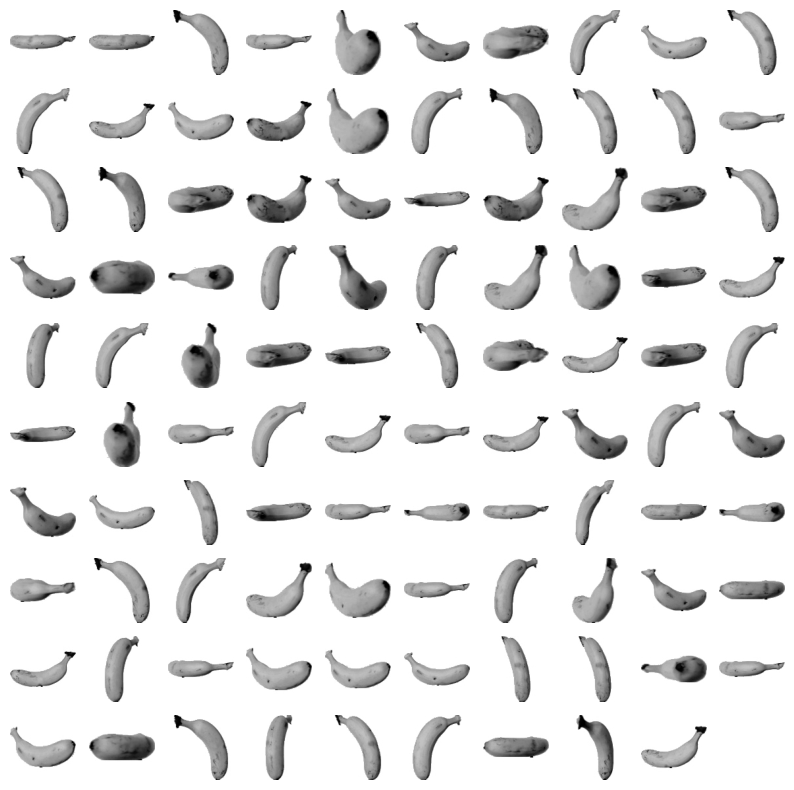

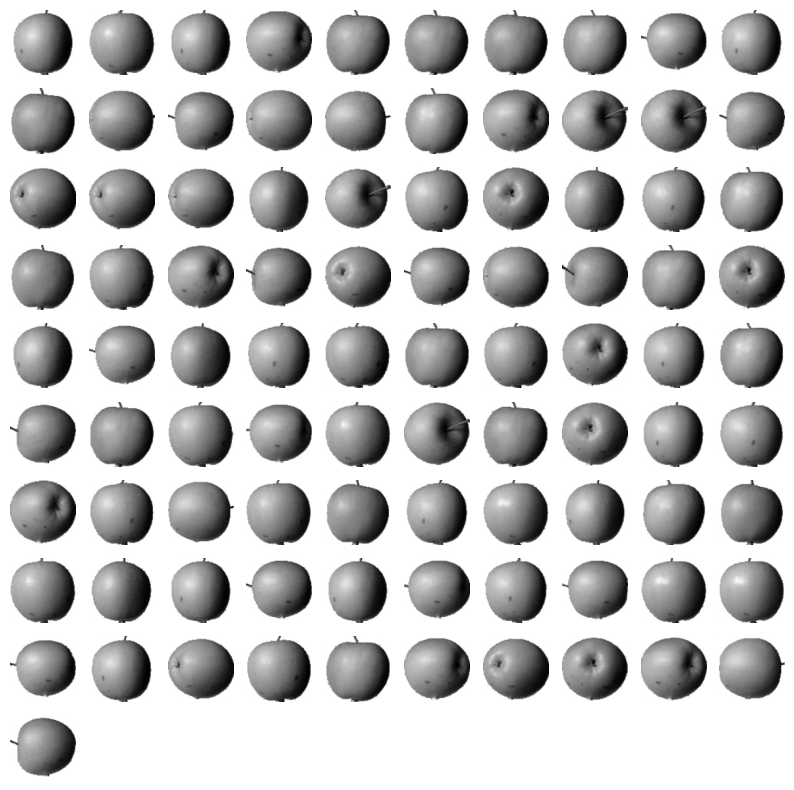

In [63]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

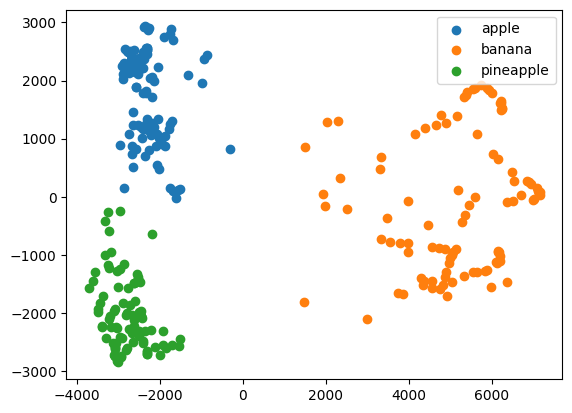

In [64]:
# 훈련 데이터의 차원을 줄였을 때 또 다른 좋은 점은 시각화임, 차원을 3개 이하로 줄이면 화면에 출력하기 쉬움
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()